1) 1)The differences bewteen simple linear regression is simple linear regressions involves only two variables: one independent variable (predictor) and one dependent variable (response). Multiple linear regressions involves one dependent variables and tow or more independent variables. 
   2)
   
   simple regression: 

   indicator variable: there is only one which is xi1

   continuous variable: Yi


   multiple regression: 
   indicator variable: xi1 Or xi2
   continuous variable: yi
   3)
   
   4) The affect of adding an interactions term is it can create different slope and different intercept for the two lines and we can knwo the how different the base and non-base is affect to the y. 
   5)Binary Variable Encodings: Often uses one-hot encoding, where each category is represented by a binary dummy variable (except one category which is the reference group).
This model form allows for different intercepts for each category, effectively modeling different baselines for different groups without assuming any order among the categories.

2) 

model with interaction: 
Yi = β0 + β1(advertising campaigns on TV) + β2(advertising campaigns online)
- the line will have the same slope and different intercept 

modell without interaction:

Yi = β0 + β1(advertising campaigns on TV) + β2(advertising campaigns online) + β1(advertising campaigns on TV)xβ2(advertising campaigns online)
- the line will have different slope and different intercept 


my guessing for thios scenrio is the line for advertising compagins online will be higher than the line for advertising campaigns and the slope for advertising compagins will be steeper. The reason is becasue nowdays, there is more people using there celphone and get adevertisment from different online platforms compare to people who actually watch TV. 





In [3]:
#3)

import pandas as pd
import statsmodels.formula.api as smf

url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
pokeaman = pd.read_csv(url).fillna('None')

pokeaman['str8fyre'] = (pokeaman['Type 1']=='Fire').astype(int)
linear_model_specification_formula = \
'str8fyre ~ Attack*Legendary + Defense*I(Q("Type 2")=="None") + C(Generation)'
log_reg_fit = smf.logit(linear_model_specification_formula, data=pokeaman).fit()
log_reg_fit.summary()


Optimization terminated successfully.
         Current function value: 0.228109
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               str8fyre   No. Observations:                  800
Model:                          Logit   Df Residuals:                      788
Method:                           MLE   Df Model:                           11
Date:                Wed, 13 Nov 2024   Pseudo R-squ.:                 0.05156
Time:                        21:23:41   Log-Likelihood:                -182.49
converged:                       True   LL-Null:                       -192.41
Covariance Type:            nonrobust   LLR p-value:                   0.04757
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   -3.2644      0.714     -4.572      0.000      -4.664      -1.865
Legendary[T.True]                            4.3478      2.179      1.996      0.046       0.078       8.618
I(Q("Type 2") == "None")[T.True]             1.5432      0.853      1.810      0.070      -0.128       3.215
C(Generation)[T.2]                          -0.0574      0.468     -0.123      0.902      -0.975       0.861
C(Generation)[T.3]                          -0.6480      0.466     -1.390      0.164      -1.561       0.265
C(Generation)[T.4]                          -0.8255      0.545     -1.516      0.130      -1.893       0.242
C(Generation)[T.5]                          -0.5375      0.449     -1.198      0.231      -1.417       0.342
C(Generation)[T.6]                           0.3213      0.477      0.673      0.501      -0.614       1.257
Attack                                       0.0172      0.006      3.086      0.002       0.006       0.028
Attack:Legendary[T.True]                    -0.0365      0.019     -1.884      0.060      -0.074       0.001
Defense                                     -0.0098      0.008     -1.247      0.213      -0.025       0.006
Defense:I(Q("Type 2") == "None")[T.True]    -0.0197      0.012     -1.651      0.099      -0.043       0.004
============================================================================================================
"""

In [18]:
#4)

import pandas as pd

url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
# fail https://github.com/KeithGalli/pandas/blob/master/pokemon_data.csv
pokeaman = pd.read_csv(url) 
pokeaman
import statsmodels.formula.api as smf

model1_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation) + Q("Sp. Def"):C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") * C(Generation)', data=pokeaman)

model2_fit = model2_spec.fit()
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     15.27
Date:                Wed, 13 Nov 2024   Prob (F-statistic):           3.50e-27
Time:                        18:17:55   Log-Likelihood:                -3649.4
No. Observations:                 800   AIC:                             7323.
Df Residuals:                     788   BIC:                             7379.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          26.8971      5.246      5.127      0.000      16.599      37.195
C(Generation)[T.2]                 20.0449      7.821      2.563      0.011       4.692      35.398
C(Generation)[T.3]                 21.3662      6.998      3.053      0.002       7.629      35.103
C(Generation)[T.4]                 31.9575      8.235      3.881      0.000      15.793      48.122
C(Generation)[T.5]                  9.4926      7.883      1.204      0.229      -5.982      24.968
C(Generation)[T.6]                 22.2693      8.709      2.557      0.011       5.173      39.366
Q("Sp. Def")                        0.5634      0.071      7.906      0.000       0.423       0.703
Q("Sp. Def"):C(Generation)[T.2]    -0.2350      0.101     -2.316      0.021      -0.434      -0.036
Q("Sp. Def"):C(Generation)[T.3]    -0.3067      0.093     -3.300      0.001      -0.489      -0.124
Q("Sp. Def"):C(Generation)[T.4]    -0.3790      0.105     -3.600      0.000      -0.586      -0.172
Q("Sp. Def"):C(Generation)[T.5]    -0.0484      0.108     -0.447      0.655      -0.261       0.164
Q("Sp. Def"):C(Generation)[T.6]    -0.3083      0.112     -2.756      0.006      -0.528      -0.089
==============================================================================
Omnibus:                      337.229   Durbin-Watson:                   1.505
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2871.522
Skew:                           1.684   Prob(JB):                         0.00
Kurtosis:                      11.649   Cond. No.                     1.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-squared (R²) quantifies the proportion of variance in the dependent variable that is predictable from the independent variables in the model. A low R-squared, like 17.6%, indicates that most of the variability in the dependent variable is not explained by the model. This might suggest that the model is missing key predictors, the underlying data is noisy, or the relationships in the data are inherently complex and possibly non-linear.

Large Coefficients with Low P-values: This result suggests that certain predictors have a statistically significant linear relationship with the outcome. Even if these effects are individually significant, they may not collectively account for a large proportion of the variance in the outcome, especially if other influential variables are not included in the model or if the model does not capture nonlinear relationships or interactions adequately.

Low R-squared: Despite having significant predictors, the low R-squared tells us that the model as a whole does not capture the majority of the variance in the dependent variable. This could be due to:

Omitted Variable Bias: Important variables that significantly affect the outcome are not included in the model.
Model Misspecification: The form of the model may not be appropriate, perhaps requiring nonlinear terms or interaction effects not included.
Inherent Variability: The dependent variable may be influenced by random factors not captured by any model.


In [17]:
#5)
import numpy as np
from sklearn.model_selection import train_test_split

fifty_fifty_split_size = int(pokeaman.shape[0]*0.5)

# Replace "NaN" (in the "Type 2" column with "None")
pokeaman.fillna('None', inplace=True)

np.random.seed(130)
pokeaman_train,pokeaman_test = \
  train_test_split(pokeaman, train_size=fifty_fifty_split_size)
pokeaman_train
model_spec3 = smf.ols(formula='HP ~ Attack + Defense', 
                      data=pokeaman_train)
model3_fit = model_spec3.fit()
model3_fit.summary()
yhat_model3 = model3_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model3_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model3)[0,1]**2)
model4_linear_form = 'HP ~ Attack * Defense * Speed * Legendary'
model4_linear_form += ' * Q("Sp. Def") * Q("Sp. Atk")'
# DO NOT try adding '* C(Generation) * C(Q("Type 1")) * C(Q("Type 2"))'
# That's 6*18*19 = 6*18*19 possible interaction combinations...
# ...a huge number that will blow up your computer

model4_spec = smf.ols(formula=model4_linear_form, data=pokeaman_train)
model4_fit = model4_spec.fit()
model4_fit.summary()
yhat_model4 = model4_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model4_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model4)[0,1]**2)

'In sample' R-squared:     0.14771558304519894
'Out of sample' R-squared: 0.21208501873920738
'In sample' R-squared:     0.46709442115833855
'Out of sample' R-squared: 0.002485342598992873


In [ ]:
#5) The code started with setting random seed to ensure reproducibility of the results. The dataset is split 50/50 into training and testing sets. This method is often used to evaluate the model's performance on unseen data, although in practice, different ratios might be used depending on the size and nature of the data.
Model Complexity vs. Interpretability: Model 3 is simpler and easier to interpret, while Model 4, with its interaction terms, can potentially provide a more accurate but complex picture. However, more parameters can lead to overfitting, especially if not enough data points are available.
Evaluation of Fit: By comparing in-sample and out-of-sample R-squared, you can assess not only how well the model fits the training data but also how well it generalizes to new data. A significant drop in out-of-sample R-squared might suggest overfitting in the more complex model.
Practical Application: These models can help in predicting Pokémon health based on various attributes, useful for game strategy or analysis. The interaction terms specifically can indicate synergistic effects that might be capitalized on during gameplay.

In [26]:
#6)

# "Cond. No." WAS 343.0 WITHOUT to centering and scaling
model3_fit.summary() 
from patsy import center, scale

model3_linear_form_center_scale = \
  'HP ~ scale(center(Attack)) + scale(center(Defense))' 
model_spec3_center_scale = smf.ols(formula=model3_linear_form_center_scale,
                                   data=pokeaman_train)
model3_center_scale_fit = model_spec3_center_scale.fit()
model3_center_scale_fit.summary()
# "Cond. No." is NOW 1.66 due to centering and scaling
model4_linear_form_CS = 'HP ~ scale(center(Attack)) * scale(center(Defense))'
model4_linear_form_CS += ' * scale(center(Speed)) * Legendary' 
model4_linear_form_CS += ' * scale(center(Q("Sp. Def"))) * scale(center(Q("Sp. Atk")))'
# Legendary is an indicator, so we don't center and scale that

model4_CS_spec = smf.ols(formula=model4_linear_form_CS, data=pokeaman_train)
model4_CS_fit = model4_CS_spec.fit()
model4_CS_fit.summary().tables[-1]  # Cond. No. is 2,250,000,000,000,000

# The condition number is still bad even after centering and scaling
# Just as the condition number was very bad to start with
model4_fit.summary().tables[-1]  # Cond. No. is 12,000,000,000,000,000

Omnibus:,214.307,Durbin-Watson:,1.992
Prob(Omnibus):,0.000,Jarque-Bera (JB):,2354.664
Skew:,2.026,Prob(JB):,0.00
Kurtosis:,14.174,Cond. No.,1.20e+16


In [ ]:
#6) Multicollinearity occurs when one or more predictor variables in a regression model are highly correlated. This can be problematic because:

It inflates the variance of the coefficient estimates, making them unstable and sensitive to changes in the model. This can lead to large swings in coefficient estimates for small changes in the data or the model.
Highly correlated predictors mean that the information they provide is redundant, complicating the task of isolating the effect of each predictor on the outcome variable.
High multicollinearity is often indicated by a high condition number in the model summary, which reflects the sensitivity of the model's output to its input. Large condition numbers suggest potential numerical instability in the regression solution.

Overfitting: With many interaction terms, the model might fit the training data very well, capturing noise rather than just the underlying relationship. This makes the model less capable of generalizing to new, unseen data.

In [33]:
#7)

# Here's something a little more reasonable...
model5_linear_form = 'HP ~ Attack + Defense + Speed + Legendary'
model5_linear_form += ' + Q("Sp. Def") + Q("Sp. Atk")'
model5_linear_form += ' + C(Generation) + C(Q("Type 1")) + C(Q("Type 2"))'

model5_spec = smf.ols(formula=model5_linear_form, data=pokeaman_train)
model5_fit = model5_spec.fit()
model5_fit.summary()
yhat_model5 = model5_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model5_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model5)[0,1]**2)
# Here's something a little more reasonable...
model6_linear_form = 'HP ~ Attack + Speed + Q("Sp. Def") + Q("Sp. Atk")'
# And here we'll add the significant indicators from the previous model
# https://chatgpt.com/share/81ab88df-4f07-49f9-a44a-de0cfd89c67c
model6_linear_form += ' + I(Q("Type 1")=="Normal")'
model6_linear_form += ' + I(Q("Type 1")=="Water")'
model6_linear_form += ' + I(Generation==2)'
model6_linear_form += ' + I(Generation==5)'

model6_spec = smf.ols(formula=model6_linear_form, data=pokeaman_train)
model6_fit = model6_spec.fit()
model6_fit.summary()
yhat_model6 = model6_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model6_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2)
# And here's a slight change that seems to perhaps improve prediction...
model7_linear_form = 'HP ~ Attack * Speed * Q("Sp. Def") * Q("Sp. Atk")'
model7_linear_form += ' + I(Q("Type 1")=="Normal")'
model7_linear_form += ' + I(Q("Type 1")=="Water")'
model7_linear_form += ' + I(Generation==2)'
model7_linear_form += ' + I(Generation==5)'

model7_spec = smf.ols(formula=model7_linear_form, data=pokeaman_train)
model7_fit = model7_spec.fit()
model7_fit.summary()
yhat_model7 = model7_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model7_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2)
# And here's a slight change that seems to perhas improve prediction...
model7_linear_form_CS = 'HP ~ scale(center(Attack)) * scale(center(Speed))'
model7_linear_form_CS += ' * scale(center(Q("Sp. Def"))) * scale(center(Q("Sp. Atk")))'
# We DO NOT center and scale indicator variables
model7_linear_form_CS += ' + I(Q("Type 1")=="Normal")'
model7_linear_form_CS += ' + I(Q("Type 1")=="Water")'
model7_linear_form_CS += ' + I(Generation==2)'
model7_linear_form_CS += ' + I(Generation==5)'

model7_CS_spec = smf.ols(formula=model7_linear_form_CS, data=pokeaman_train)
model7_CS_fit = model7_CS_spec.fit()
model7_CS_fit.summary().tables[-1] 
# "Cond. No." is NOW 15.4 due to centering and scaling
# "Cond. No." WAS 2,340,000,000 WITHOUT to centering and scaling
model7_fit.summary().tables[-1]

'In sample' R-squared:     0.3953093398462648
'Out of sample' R-squared: 0.28449035526101785
'In sample' R-squared:     0.3322137765132316
'Out of sample' R-squared: 0.30694310079924764
'In sample' R-squared:     0.3937053274454686
'Out of sample' R-squared: 0.33586241420001894


Omnibus:,272.730,Durbin-Watson:,1.793
Prob(Omnibus):,0.000,Jarque-Bera (JB):,4638.214
Skew:,2.636,Prob(JB):,0.00
Kurtosis:,18.827,Cond. No.,1.25e+09


From Model 3 and 4 to Model 5: Enhanced complexity by adding new predictors and possibly refining existing ones to better capture the relationships influencing Pokémon HP, based on earlier findings or additional insights.
From Model 5 to Model 6: Focused refinement by paring down to significant predictors and using binary indicators for influential types and generations, streamlining the model for clarity and targeted insights.
From Model 6 to Model 7: Increased sophistication by incorporating interaction terms to probe into complex interdependencies between predictors, aiming for a more detailed and accurate modeling of Pokémon HP dynamics.

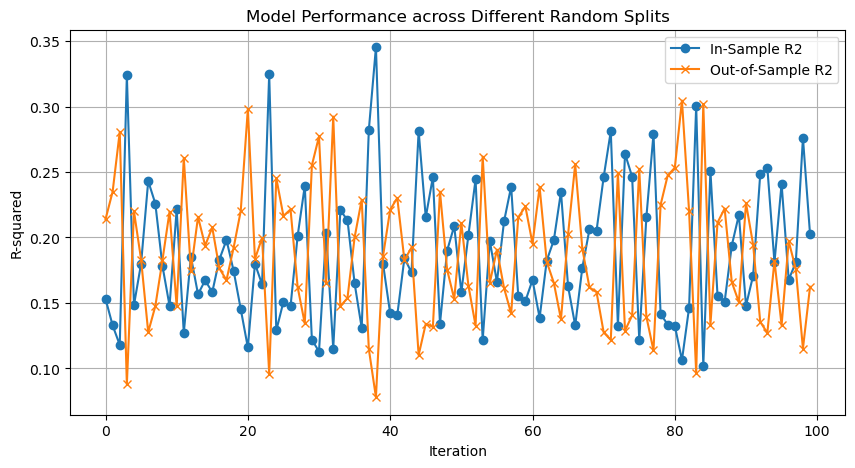

In [22]:
8) #here is the code that chatbot help me generate with:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the data
url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
pokeaman = pd.read_csv(url).fillna('None')

# Define the number of iterations
n_iterations = 100
results = []

for i in range(n_iterations):
    # Split the data into training and testing sets
    pokeaman_train, pokeaman_test = train_test_split(pokeaman, train_size=0.5)

    # Define and fit the model
    model_spec = smf.ols(formula='HP ~ Attack + Defense', data=pokeaman_train)
    model_fit = model_spec.fit()

    # Predict on test set
    yhat = model_fit.predict(pokeaman_test)
    y = pokeaman_test.HP

    # Collect in-sample and out-of-sample R-squared
    in_sample_r2 = model_fit.rsquared
    out_of_sample_r2 = np.corrcoef(y, yhat)[0, 1] ** 2
    results.append((in_sample_r2, out_of_sample_r2))

# Convert results to a DataFrame for easier handling
results_df = pd.DataFrame(results, columns=['In-Sample R2', 'Out-of-Sample R2'])
# Create a plot of the collected R-squared values
plt.figure(figsize=(10, 5))
plt.plot(results_df['In-Sample R2'], label='In-Sample R2', marker='o')
plt.plot(results_df['Out-of-Sample R2'], label='Out-of-Sample R2', marker='x')
plt.title('Model Performance across Different Random Splits')
plt.xlabel('Iteration')
plt.ylabel('R-squared')
plt.legend()
plt.grid(True)
plt.show('PNG')


In [45]:
import plotly.express as px  # etc.

songs_training_data,songs_testing_data = train_test_split(songs, train_size=31)
linear_form = 'danceability ~ energy * loudness + energy * mode'
   
reps = 100
in_sample_Rsquared = np.array([0.0]*reps)
out_of_sample_Rsquared = np.array([0.0]*reps)
for i in range(reps):
    songs_training_data,songs_testing_data = \
      train_test_split(songs, train_size=31)
    final_model_fit = smf.ols(formula=linear_form, 
                              data=songs_training_data).fit()
    in_sample_Rsquared[i] = final_model_fit.rsquared
    out_of_sample_Rsquared[i] = \
      np.corrcoef(songs_testing_data.danceability, 
                  final_model_fit.predict(songs_testing_data))[0,1]**2
    
df = pd.DataFrame({"In Sample Performance (Rsquared)": in_sample_Rsquared,
                   "Out of Sample Performance (Rsquared)": out_of_sample_Rsquared})  
fig = px.scatter(df, x="In Sample Performance (Rsquared)", 
                     y="Out of Sample Performance (Rsquared)")
fig.add_trace(go.Scatter(x=[0,1], y=[0,1], name="y=x", line_shape='linear'))

NameError: name 'songs' is not defined

In [46]:
#9)
model7_gen1_predict_future = smf.ols(formula=model7_linear_form,
                                   data=pokeaman[pokeaman.Generation==1])
model7_gen1_predict_future_fit = model7_gen1_predict_future.fit()
print("'In sample' R-squared:    ", model7_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model7_gen1_predict_future_fit.rsquared, "(gen1_predict_future)")
y = pokeaman[pokeaman.Generation!=1].HP
yhat = model7_gen1_predict_future_fit.predict(pokeaman[pokeaman.Generation!=1])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1_predict_future)")

'In sample' R-squared:     0.3937053274454686 (original)
'Out of sample' R-squared: 0.33586241420001894 (original)
'In sample' R-squared:     0.5726118179916575 (gen1_predict_future)
'Out of sample' R-squared: 0.11151363354803218 (gen1_predict_future)


In [38]:
#9)
model7_gen1to5_predict_future = smf.ols(formula=model7_linear_form,
                                   data=pokeaman[pokeaman.Generation!=6])
model7_gen1to5_predict_future_fit = model7_gen1to5_predict_future.fit()
print("'In sample' R-squared:    ", model7_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model7_gen1to5_predict_future_fit.rsquared, "(gen1to5_predict_future)")
y = pokeaman[pokeaman.Generation==6].HP
yhat = model7_gen1to5_predict_future_fit.predict(pokeaman[pokeaman.Generation==6])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1to5_predict_future)")

'In sample' R-squared:     0.3937053274454686 (original)
'Out of sample' R-squared: 0.33586241420001894 (original)
'In sample' R-squared:     0.3904756578094535 (gen1to5_predict_future)
'Out of sample' R-squared: 0.23394915464343125 (gen1to5_predict_future)


In [37]:
#9)
model6_gen1_predict_future = smf.ols(formula=model6_linear_form,
                                   data=pokeaman[pokeaman.Generation==1])
model6_gen1_predict_future_fit = model6_gen1_predict_future.fit()
print("'In sample' R-squared:    ", model6_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model6_gen1_predict_future_fit.rsquared, "(gen1_predict_future)")
y = pokeaman[pokeaman.Generation!=1].HP
yhat = model6_gen1_predict_future_fit.predict(pokeaman[pokeaman.Generation!=1])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1_predict_future)")

'In sample' R-squared:     0.3322137765132316 (original)
'Out of sample' R-squared: 0.30694310079924764 (original)
'In sample' R-squared:     0.4433880517727282 (gen1_predict_future)
'Out of sample' R-squared: 0.1932858534276128 (gen1_predict_future)


In [36]:
#9)

model6_gen1to5_predict_future = smf.ols(formula=model6_linear_form,
                                   data=pokeaman[pokeaman.Generation!=6])
model6_gen1to5_predict_future_fit = model6_gen1to5_predict_future.fit()
print("'In sample' R-squared:    ", model6_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model6_gen1to5_predict_future_fit.rsquared, "(gen1to5_predict_future)")
y = pokeaman[pokeaman.Generation==6].HP
yhat = model6_gen1to5_predict_future_fit.predict(pokeaman[pokeaman.Generation==6])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1to5_predict_future)")

'In sample' R-squared:     0.3322137765132316 (original)
'Out of sample' R-squared: 0.30694310079924764 (original)
'In sample' R-squared:     0.33517279824114776 (gen1to5_predict_future)
'Out of sample' R-squared: 0.26262690178799936 (gen1to5_predict_future)


#9) 

my understanding of the code:
    
Model Training on Specific Generations:

The train separate models (model7_gen1_predict_future, model6_gen1_predict_future) on Generation 1 data using defined linear formulas (model7_linear_form, model6_linear_form). The models are designed to predict HP (Hit Points) based on variables not detailed here but assumed to be part of your linear form equations.
In-Sample R-Squared Calculation:

The R-squared value for each model when fitted to the data it was trained on is printed, indicating how well the model explains the variation in HP within that specific subset of data (Generation 1).
Out-of-Sample R-Squared Calculation for Predictions on Other Generations:

The model trained on Generation 1 to predict HP for Pokémon from other generations. The correlation coefficient squared between the actual HP values and predicted HP values from this model offers insight into the model's predictive accuracy outside of its training dataset.
Application of Models Trained on Multiple Generations:

Additional models are trained on data excluding certain generations (like Generation 6) and tested both on the excluded generation and on an unspecified test dataset (pokeaman_test). This method evaluates how well models generalize to entirely new data, not just other generations but potentially new Pokémon not seen during training.


potential overfitting and underfitting:
if in sample R-squared is high but out-of-sample R-sqaured is low, it might indicate overfitting,where the model overfitts the data too detailed. 
low R-squared values both in-sample and out-of-sample might suggest underfitting, where the model is too simple to capture underlying patterns effectively.

here is the link to my chatbot: https://chatgpt.com/share/67351d5a-4148-8013-b22c-27d137d0c88b